<a href="https://colab.research.google.com/github/yogeeshsm/Tensorflow_projects/blob/main/Traffic_Flow_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.5776 - val_loss: 0.4433
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3418 - val_loss: 0.4516
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3426 - val_loss: 0.4536
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3455 - val_loss: 0.4456
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3830 - val_loss: 0.4455
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3253 - val_loss: 0.4435
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.3645 - val_loss: 0.4446
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3471 - val_loss: 0.4404
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3502 - val_loss: 0.4408
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3211 - val_loss: 0.4415
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


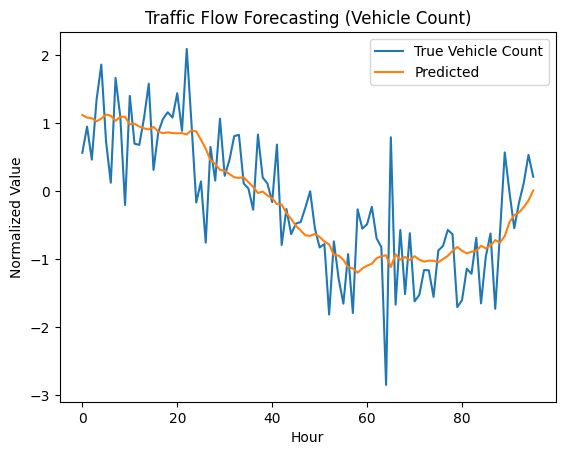

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic traffic flow data (vehicle count + speed)
def generate_traffic_data(size=500):
    t = np.linspace(0, 50, size)
    vehicle_count = 50 + 10 * np.sin(0.5 * t) + np.random.normal(scale=5, size=size)
    avg_speed = 60 - 5 * np.cos(0.5 * t) + np.random.normal(scale=2, size=size)
    return np.stack([vehicle_count, avg_speed], axis=1).astype(np.float32)

data = generate_traffic_data()

# Normalize
mean = data.mean(axis=0)
std = data.std(axis=0)
data = (data - mean) / std

# Create sequences: past 24 steps to predict next vehicle count
def create_dataset(data, window=24, target_index=0):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window, target_index])  # Predict vehicle count
    return np.array(X), np.array(y)

X, y = create_dataset(data, window=24, target_index=0)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(24, 2)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Predict and plot
preds = model.predict(X_test[:100]).flatten()
plt.plot(y_test[:100], label='True Vehicle Count')
plt.plot(preds, label='Predicted')
plt.title("Traffic Flow Forecasting (Vehicle Count)")
plt.xlabel("Hour")
plt.ylabel("Normalized Value")
plt.legend()
plt.show()
